## Modelo Predictor Duración del Viaje

## Load libreries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## Ingest curated data

In [2]:
data_path = 'data/processed/data_trips_red_inferences.csv'
data = pd.read_csv(data_path)

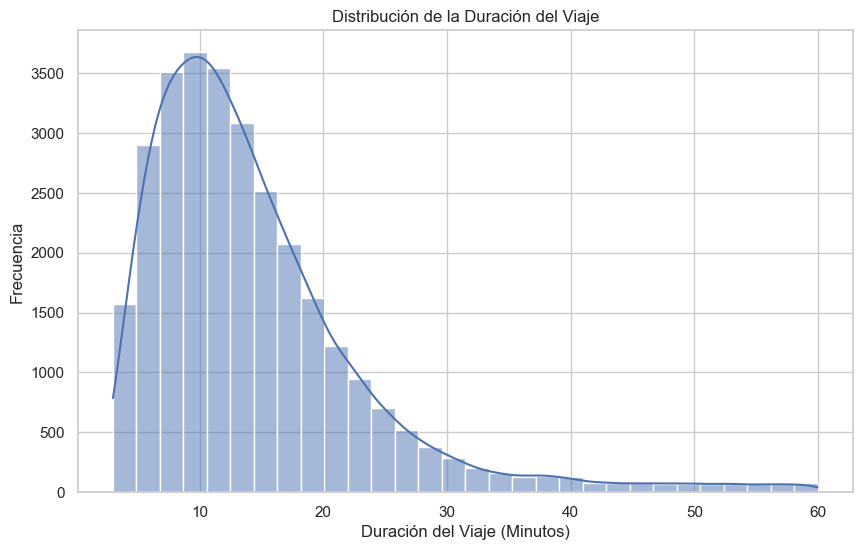

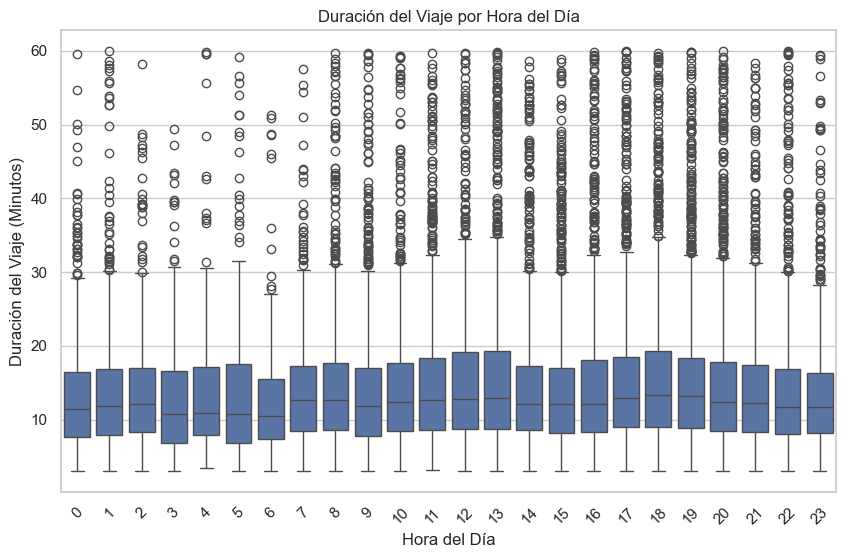

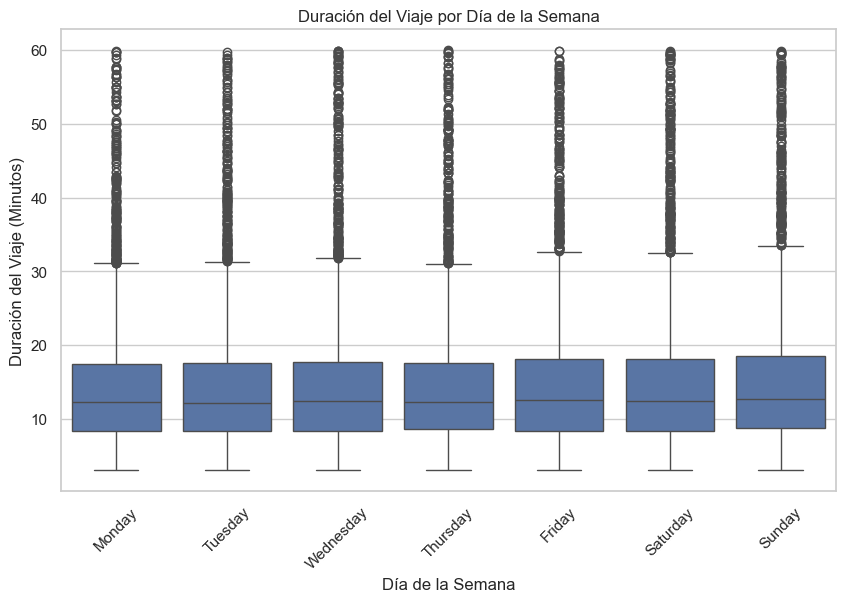

In [3]:
# Configuración para visualización
sns.set(style="whitegrid")

# Análisis exploratorio básico
# Distribución de la duración del viaje
plt.figure(figsize=(10, 6))
sns.histplot(data['trip_minutes'], bins=30, kde=True)
plt.title('Distribución de la Duración del Viaje')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre la duración del viaje y la hora del desbloqueo
plt.figure(figsize=(10, 6))
sns.boxplot(x='unlock_hour', y='trip_minutes', data=data)
plt.title('Duración del Viaje por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Duración del Viaje (Minutos)')
plt.xticks(rotation=45)
plt.show()

# Relación entre la duración del viaje y el día de la semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='trip_day_of_week', y='trip_minutes', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Duración del Viaje por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Duración del Viaje (Minutos)')
plt.xticks(rotation=45)
plt.show()


## Linear Regression Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 1. Tratamiento de valores atípicos
# Considerando la distribución, vamos a limitar la duración de los viajes a 3 desviaciones estándar del promedio
mean_duration = data['trip_minutes'].mean()
std_duration = data['trip_minutes'].std()
cutoff = mean_duration + 3*std_duration
data_filtered = data[data['trip_minutes'] <= cutoff]

# 2. Preparación de los datos
# Definiendo las características y el objetivo
X = data_filtered[['unlock_hour', 'trip_day_of_week', 'latitude_unlock', 'longitude_unlock']]
y = data_filtered['trip_minutes']

# Codificación de variables categóricas y escalado de características numéricas
categorical_features = ['unlock_hour', 'trip_day_of_week']
numeric_features = ['latitude_unlock', 'longitude_unlock']

# Creando el transformador de columnas para aplicar transformaciones diferentes a tipos de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 3. División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Creando el pipeline para el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entrenando el modelo
model.fit(X_train, y_train)

# Ahora que el modelo está entrenado, evaluaremos su rendimiento
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculando métricas de rendimiento
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

rmse, mae


(7.045397964345584, 5.465719367506456)

In [5]:
# Preparación de los datos
X = data[['unlock_hour', 'trip_day_of_week', 'latitude_unlock', 'longitude_unlock', 'distance']]
y = data['trip_minutes']

categorical_features = ['unlock_hour', 'trip_day_of_week']
numeric_features = ['latitude_unlock', 'longitude_unlock', 'distance']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenamiento del modelo de Regresión Lineal
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Modelo de Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenamiento del modelo de Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Modelo de XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42))
])

# Entrenamiento del modelo de XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Resultados
print("Resultados de la Regresión Lineal: RMSE =", rmse_linear, ", MAE =", mae_linear)
print("Resultados del Random Forest: RMSE =", rmse_rf, ", MAE =", mae_rf)
print("Resultados de XGBoost: RMSE =", rmse_xgb, ", MAE =", mae_xgb)

Resultados de la Regresión Lineal: RMSE = 8.286177782128478 , MAE = 4.975720641281769
Resultados del Random Forest: RMSE = 7.64524291915794 , MAE = 4.5442826580821185
Resultados de XGBoost: RMSE = 7.688338868609406 , MAE = 4.501640795874329


# Intrepretación de resultados: 

Observaciones:

    Mejora respecto al Modelo de Regresión Lineal: Tanto el modelo de Random Forest como el de XGBoost han mejorado el rendimiento en comparación con el modelo de regresión lineal, lo que indica que son capaces de capturar relaciones más complejas en los datos que el modelo lineal no pudo.
    Random Forest vs. XGBoost: El modelo de Random Forest ha obtenido un RMSE ligeramente más bajo que el modelo de XGBoost, lo que sugiere que en este caso, pudo haber capturado la estructura de los datos un poco mejor. Sin embargo, el MAE de XGBoost es marginalmente mejor, indicando que en términos de errores absolutos medios, XGBoost tiene una ligera ventaja.

    Best Model -> XGBoost

## Fine Tunning using Grid Search + Cross Validation

In [6]:
from sklearn.model_selection import GridSearchCV

# Configuración del espacio de hiperparámetros a explorar
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [3, 5, 7, 10, 15],
    'regressor__learning_rate': [0.01, 0.1, 0.2, 0.4]
}

# Configurando GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Ejecutando la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor puntuación
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntuación (RMSE): ", np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   0.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   0.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   0.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   0.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=50; total time=   0.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regress

✅Se mejora la puntuación de RMSE, con una  reducción de aproximadamente 0.355 pasando de 7.688 a 7.333

🎯Mejores parámetros encontrados: Los mejores parámetros son aquellos que logran la mejor puntuación en la métrica seleccionada (en este caso, RMSE). En tu caso, los mejores parámetros encontrados son:

✅regressor__learning_rate: 0.1
✅regressor__max_depth: 3
✅regressor__n_estimators: 100

In [7]:
# Asumiendo que 'best_model' es tu modelo XGBoost ajustado
best_model = grid_search.best_estimator_

# Obteniendo importancias de las características
feature_importances = best_model.named_steps['regressor'].feature_importances_

# Para visualizar correctamente, necesitamos las columnas transformadas del preprocesador
columns_transformed = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
columns_total = np.concatenate([numeric_features, columns_transformed])

# Creando un DataFrame para una visualización más fácil
importance_df = pd.DataFrame(feature_importances, index=columns_total, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(importance_df)

                            Importance
distance                      0.497269
unlock_hour_5                 0.057984
unlock_hour_13                0.035168
unlock_hour_7                 0.031043
unlock_hour_23                0.024776
unlock_hour_16                0.024315
unlock_hour_6                 0.021457
unlock_hour_8                 0.021362
latitude_unlock               0.018751
unlock_hour_19                0.018362
unlock_hour_12                0.018287
longitude_unlock              0.018245
unlock_hour_0                 0.017617
trip_day_of_week_Sunday       0.016130
trip_day_of_week_Monday       0.016024
unlock_hour_18                0.014315
unlock_hour_20                0.014199
unlock_hour_4                 0.013940
unlock_hour_1                 0.013637
trip_day_of_week_Saturday     0.013542
unlock_hour_17                0.012465
trip_day_of_week_Wednesday    0.012167
unlock_hour_11                0.011793
unlock_hour_3                 0.011035
unlock_hour_9            

# Evaluación de la importacia de características

In [8]:
# best_model' es tu modelo XGBoost ajustado
best_model = grid_search.best_estimator_

# Obteniendo importancias de las características
feature_importances = best_model.named_steps['regressor'].feature_importances_

# Para visualizar correctamente, necesitamos las columnas transformadas del preprocesador
columns_transformed = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
columns_total = np.concatenate([numeric_features, columns_transformed])

# Creando un DataFrame para una visualización más fácil
importance_df = pd.DataFrame(feature_importances, index=columns_total, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(importance_df)


                            Importance
distance                      0.497269
unlock_hour_5                 0.057984
unlock_hour_13                0.035168
unlock_hour_7                 0.031043
unlock_hour_23                0.024776
unlock_hour_16                0.024315
unlock_hour_6                 0.021457
unlock_hour_8                 0.021362
latitude_unlock               0.018751
unlock_hour_19                0.018362
unlock_hour_12                0.018287
longitude_unlock              0.018245
unlock_hour_0                 0.017617
trip_day_of_week_Sunday       0.016130
trip_day_of_week_Monday       0.016024
unlock_hour_18                0.014315
unlock_hour_20                0.014199
unlock_hour_4                 0.013940
unlock_hour_1                 0.013637
trip_day_of_week_Saturday     0.013542
unlock_hour_17                0.012465
trip_day_of_week_Wednesday    0.012167
unlock_hour_11                0.011793
unlock_hour_3                 0.011035
unlock_hour_9            

🎯Las características con mayor poder predictivo junto con sus puntajes de importancia:

✅Distancia - 0.497269
✅unlock_hour_5 - 0.057984
✅unlock_hour_13 - 0.035168
✅unlock_hour_7 - 0.031043
✅unlock_hour_23 - 0.024776

👉Estos son los cinco principales en orden descendente según sus puntajes de importancia.

# Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score

# Calculando RMSE a través de validación cruzada
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Scores: ", rmse_scores)
print("Promedio: ", rmse_scores.mean())
print("Desviación estándar: ", rmse_scores.std())


Scores:  [7.20036482 7.39733021 7.5242784  7.3717623  7.21023397]
Promedio:  7.340793940320542
Desviación estándar:  0.12213777678850982


Los puntajes tienen un promedio de aproximadamente 7.34 y una desviación estándar de aproximadamente 0.122. La desviación estándar indica la dispersión de los puntajes alrededor del promedio. Cuanto mayor sea la desviación estándar, mayor será la dispersión de los datos. En este caso, la desviación estándar es relativamente baja, lo que sugiere que los puntajes están bastante cerca del promedio.

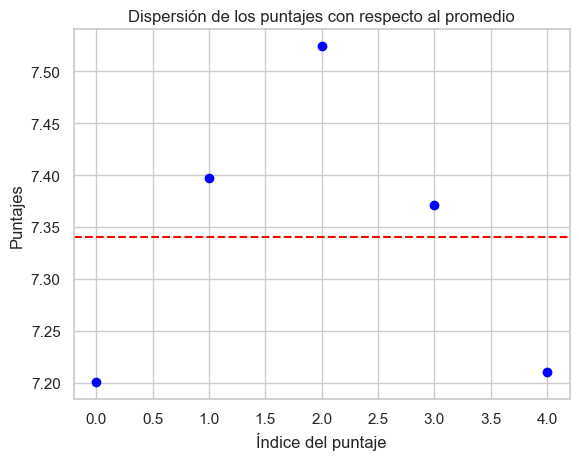

In [10]:

# Puntajes
scores = np.array([7.20036482, 7.39733021, 7.5242784, 7.3717623, 7.21023397])

# Promedio
promedio = np.mean(scores)

# Calcular la distancia de cada puntaje al promedio
distancias = scores - promedio

# Crear el gráfico de dispersión
plt.scatter(range(len(scores)), scores, color='blue')

# Línea horizontal en el promedio
plt.axhline(y=promedio, color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Índice del puntaje')
plt.ylabel('Puntajes')
plt.title('Dispersión de los puntajes con respecto al promedio')

# Mostrar el gráfico
plt.show()

# Configuración del modelo según hiperparámetros

In [11]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Configurando el modelo con los hiperparámetros optimizados
optimized_xgb_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    objective='reg:squarederror',
    seed=42
)

# No olvides reutilizar el preprocesador que definiste anteriormente para la transformación de características
optimized_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', optimized_xgb_model)
])

# Entrenando el modelo optimizado
optimized_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['latitude_unlock',
                                                   'longitude_unlock',
                                                   'distance']),
                                                 ('cat', OneHotEncoder(),
                                                  ['unlock_hour',
                                                   'trip_day_of_week'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# Evaluación del modelo

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Realizando predicciones en el conjunto de prueba
y_pred_optimized = optimized_pipeline.predict(X_test)

# Evaluando el rendimiento del modelo optimizado
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

print("RMSE Optimizado:", rmse_optimized)
print("MAE Optimizado:", mae_optimized)


RMSE Optimizado: 7.368278197258956
MAE Optimizado: 4.368357319462361


In [13]:
# Importa la biblioteca pickle
import pickle

# Guarda el modelo optimizado
with open('prediccionDuracion_optimized_xgb_model_lr01_md_3_n_est_100_O_regsuarederror_seed42.pkl', 'wb') as f:
    pickle.dump(optimized_pipeline, f)

## Stacking de Modelos

# Train base models

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idDriver                15725 non-null  object 
 1   idBike                  30001 non-null  int64  
 2   trip_minutes            30001 non-null  float64
 3   fleet                   30001 non-null  int64  
 4   unlock_date             30001 non-null  object 
 5   unlock_hour             30001 non-null  int64  
 6   latitude_unlock         30001 non-null  float64
 7   longitude_unlock        30001 non-null  float64
 8   station_unlock          30001 non-null  int64  
 9   dock_unlock             30001 non-null  int64  
 10  unlock_station_name     30001 non-null  object 
 11  lock_date               30001 non-null  object 
 12  lock_hour               30001 non-null  int64  
 13  latitude_lock           30001 non-null  float64
 14  longitude_lock          30001 non-null

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Asumiendo que 'data' es tu DataFrame original
# Haciendo una copia de los datos para trabajar
data_copy = data.copy()

# Seleccionando características para el modelo y la variable objetivo
X = data_copy[['unlock_hour', 'latitude_unlock', 'longitude_unlock', 'distance', 'trip_day_of_week']]
y = data_copy['trip_minutes']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Codificación One-hot para variables categóricas y escalado para numéricas
numeric_features = ['unlock_hour', 'latitude_unlock', 'longitude_unlock', 'distance']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['trip_day_of_week']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Definir el modelo con el preprocesador
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestRegressor(random_state=42))])

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Ahora, el modelo está listo para ser utilizado para predicciones o para formar parte de un ensamblaje


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['unlock_hour',
                                                   'latitude_unlock',
                                                   'longitude_unlock',
                                                   'distance']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['trip_day_of_week'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

# Transformacion de variables

# Generación de predicciones de los modelos base

# Preparación de los datos (revisión)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Suponiendo que X y y ya están definidos
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifica las características numéricas y categóricas
numeric_features = ['unlock_hour', 'latitude_unlock', 'longitude_unlock', 'distance']
categorical_features = ['trip_day_of_week']  # Asegúrate de incluir todas las variables categóricas aquí

# Creación de transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicando el preprocesamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



# Entrenamiento de Modelos Base con Datos Preprocesados

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Entrenando RandomForest con datos preprocesados
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Continúa con el proceso de stacking aquí, asegurándote de utilizar las versiones preprocesadas de X_train y X_test


RandomForestRegressor(random_state=42)

# Proceso de stacking

In [20]:
# Asegurándose de que xgb_model está entrenado y listo para ser utilizado
# preds_xgb = xgb_model.predict(X_test_preprocessed)  # Asumiendo que este es tu modelo XGBoost optimizado

# Haciendo predicciones en el conjunto de prueba preprocesado con ambos modelos
preds_rf = rf_model.predict(X_test_preprocessed)


In [21]:
from xgboost import XGBRegressor

# Asumiendo que XGBRegressor ya ha sido importado y está disponible
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_preprocessed, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
preds_xgb = xgb_model.predict(X_test_preprocessed)

In [23]:
# Combinando las predicciones para el meta-modelo
stacked_features_test = np.column_stack((preds_rf, preds_xgb))

# Entrenamiento del meta-modelo
meta_model = LinearRegression()
meta_model.fit(stacked_features_test, y_test)  # Este paso debería idealmente usar un conjunto de validación

# Predicciones finales y evaluación
final_predictions = meta_model.predict(stacked_features_test)
rmse_stacked = np.sqrt(mean_squared_error(y_test, final_predictions))
mae_stacked = mean_absolute_error(y_test, final_predictions)

print("RMSE del Modelo Ensamblado:", rmse_stacked)
print("MAE del Modelo Ensamblado:", mae_stacked)


RMSE del Modelo Ensamblado: 7.366898801857343
MAE del Modelo Ensamblado: 4.343473783055906


# Guardar Meta Modelo (staking de modelos)

In [24]:
# Reemplaza 'meta_model' con el nombre de tu variable del meta-modelo si es diferente
with open('prediccionDuracion_meta_model_RF_XGBoost.pkl', 'wb') as file:
    pickle.dump(meta_model, file)